-----

# implementing custom k-nearest neighbors algorithm

*Note* :This project all built-in function in python3 
##### first the pseudo-code ( general intuition about how the code work)

```python


# first inialize the KNN algorithem with the k-paramter -> number of neighbors to consider
k = 5 # 5 neighbor points
classifer = KNN(k)
# fit the data (X-> features) and (y-> target output)
classifer.fit(X, y)
distances_list = [] # will be populated with the distance between the test_point and each other data_points

def predict(x_test_point): # take test point(s)
    for each train_point in the dataset: # (train_dataset)
        # calculate distance between xtest_point and the train_point
        distanace = calc_euclidian_distance(x_test_point, train_point)
        distances_list.append(distanace)
    # sort the distances in an accending order
    sort(distances_list)  
    # choose the first 5 points (because k=5) 
    neighbors = distances_list[:k]
    # the most common points will be considered as our prediction
    prediction = most_common_points(neighbors) 
    return prediction


```

In [2]:

             

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y, split_pct=None): 
        """
        Args :
        ----
        split_pct : (float) default None take values from 0 to 1
         if None all data used for evaluating the distance ,otherwise
         the data splited by precentage
          
        """
        if split_pct is None:
            self.x_train = X
            self.y_train = y
        else:    
            self.x_train, self.y_train, self.x_test, self.y_test = \
                        self.train_test_split(X, y, test_size=split_pct)
            return self.x_test, self.y_test


    def predict(self, X, distance_method=None):
        """this function compute the distance between given value "x" and each data point in the dataset

            choose shortest k values the most_common label from those k values  is choosen as label for the value "x"
            
            Args:
            ----
            X : list of test data points
            distance_method : 'euclidean_distance' or 'manhtin_distance'

            """
        predicted_labels = [self._predict(x, distance_method) for x in X]
        return predicted_labels


    def _predict(self, x, dist_method=None):

        # compute the distance
        dist_method = self.euclidean_distance if dist_method is None else dist_method

        # calculate distance between the "point x" and each point in teh dataset
        distances = [(i, dist_method(x, data_point)) for i, data_point in enumerate(self.x_train)]
        # sort acorroding to the distance
        distances.sort(key=lambda x:x[1])
        
        # get the indices of the nearest nighbors
        k_neighbors_indices = [i for i, _ in distances]
        k_neighbors_indices = k_neighbors_indices[:self.k]

        k_neighbors_labels = [self.y_train[idx] for idx in k_neighbors_indices]
        most_common_neighbor = self.most_common(k_neighbors_labels)
        return most_common_neighbor[0][0]


    def train_test_split(self, X, y, test_size):
        pct = len(X) - (len(X)* test_size)
        pct = int(pct)
        trainX, testX = X[:pct] ,X[pct:] 
        trainy, testy = y[:pct] ,y[pct:]
        return (trainX, trainy, testX, testy)



    def euclidean_distance(self, x1, x2):
        sum_res = 0
        for p1, p2 in zip(x1, x2):
            sum_res += (p1 - p2)**2
        res = sum_res**(1/2) # square root
        return res


    def manhatin_distance(self, x1, x2):
        res = 0
        for p1, p2 in zip(x1, x2):
            res += self.abs(p1 - p2)
        return res
    
    @staticmethod
    def most_common(input_list):
        itms_count = dict()
        for itm in input_list:
            if itm not in itms_count.keys():
                itms_count[itm] = 1
            itms_count[itm] += 1
        most_common_itm = sorted(itms_count.items(), key=lambda x:x[1],reverse=True)
        return most_common_itm

    
    @staticmethod
    def abs(value):
        if value < 0:
            value *= -1
        return value 




### import necessary libaries

In [3]:

import sklearn.datasets as dataset
import matplotlib.pyplot as plt

### loading the dataset

In [4]:
iris = dataset.load_iris()
X, y = iris.data, iris.target

In [5]:
features_names = {0:'satosa', 1:'versicolor', 2:'virginica'}
print(iris.target_names)
print("[sepalLenght, sepalWidth, patalLenght]") # features names / sample paramters

['setosa' 'versicolor' 'virginica']
[sepalLenght, sepalWidth, patalLenght]


### display and ploting some info about the data

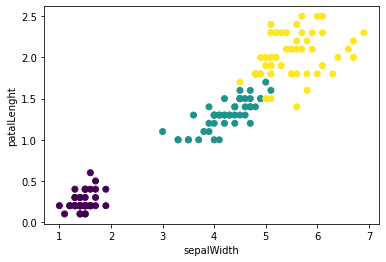

In [6]:
plt.scatter(X[:, 2], X[:, 3], c=y)

plt.xlabel("sepalWidth")
plt.ylabel("patalLenght")
plt.show()

In [7]:
print("examples of dataset features\n")
print(X[:5])
print("\n")
print("examples of dataset labels/outputs")
print(y[:5])

examples of dataset features

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


examples of dataset labels/outputs
[0 0 0 0 0]


## initilize the k-nearest neighbors

In [8]:
clf = KNN(k=5)

### fit the data to the classifier and perform train test split 

In [9]:
print(f"the lenght of the dataset is : {len(X)}")
x_test, y_test = clf.fit(X, y, 0.1)

print(f"the lenght of the train dataset after spliting by 10th precent for test_set is : {len(clf.x_train)}")

the lenght of the dataset is : 150
the lenght of the train dataset after spliting by 10th precent for test_set is : 135


## perform prediction and evaluation

In [10]:
# predictions = clf.predict(x_test)
predictions = clf.predict(x_test, clf.manhatin_distance)

In [11]:
custom_predictions = clf.predict([[1,4,5,6]])
print(custom_predictions)

[2]


In [12]:
print(f"frist 5  predictions from the classifer: \n {predictions[:5]}")
print(f"\nfrist 5  true labels : \n {y_test[:5]}")

frist 5  predictions from the classifer: 
 [2, 2, 2, 1, 2]

frist 5  true labels : 
 [2 2 2 2 2]


In [13]:
for pred_idx in predictions[:8]:
    rose_name = iris.target_names[pred_idx]
    print(rose_name)

virginica
virginica
virginica
versicolor
virginica
virginica
virginica
virginica


## calculating the model accuracy on the test_data and
### compare prediction vs true_lables

In [14]:
def calc_acc(predictions, true_labels):
    acc_score = 0
    for i in range(len(predictions)):
        if predictions[i] == true_labels[i]:
            acc_score +=1 
    return acc_score / len(true_labels) 

In [15]:
calc_acc(predictions, y_test)

0.9333333333333333

----------------------

# importing external data as csv file (comma seprated values)

## Simple Data preprocessing with pandas

In [16]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("./dataset/weather.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [17]:

print(f"number of rows/records: {len(df)}")
print(f"number of columns/features: {len(df.columns)}")

number of rows/records: 366
number of columns/features: 22


In [18]:
print(f"is there any null values in dataframe: {df.isnull().values.any()}")
print(f"number of NAN values:  {df.isnull().sum().sum()}")
df = df.dropna()
print(f"number of NAN values after droping the Nan records:  {df.isnull().sum().sum()}")

is there any null values in dataframe: True
number of NAN values:  47
number of NAN values after droping the Nan records:  0


In [19]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)

### Choosing Selected columns as features 

In [20]:
interest_cols = ['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am']

datafeatures = df[interest_cols]
targets = df['RainTomorrow']

In [21]:
datafeatures.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am
187,16.8,0.0,3.0,41.0,7.0
218,16.7,0.0,9.0,22.0,11.0
186,19.0,0.0,8.3,39.0,2.0
74,22.8,0.0,6.0,50.0,13.0
27,28.0,0.0,10.7,52.0,6.0


In [22]:
targets.head() # rain tomorow

187    No
218    No
186    No
74     No
27     No
Name: RainTomorrow, dtype: object

In [23]:
targets_values = targets.values.tolist()
features_values = datafeatures.values.tolist()
features_values[:5]

[[16.8, 0.0, 3.0, 41.0, 7.0],
 [16.7, 0.0, 9.0, 22.0, 11.0],
 [19.0, 0.0, 8.3, 39.0, 2.0],
 [22.8, 0.0, 6.0, 50.0, 13.0],
 [28.0, 0.0, 10.7, 52.0, 6.0]]

## initilaizing the classifer (custom KNN) 

In [24]:
weatherClf = KNN(k=5)
x_test, y_test = weatherClf.fit(features_values, targets_values, split_pct=0.3)

In [25]:
tomorow_raining_predictions = weatherClf.predict(x_test)

In [26]:
calc_acc(tomorow_raining_predictions, true_labels=y_test)

0.8282828282828283

# testing sklearn knn method (provided by the sklearn library)

In [27]:
x_train, y_train, x_test, y_test =  weatherClf.train_test_split(features_values, targets_values, 0.3)

In [28]:
knneighbor = KNeighborsClassifier(5)
knneighbor.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
raining_predictions = knneighbor.predict(x_test)

In [30]:
calc_acc(raining_predictions, true_labels=y_test)

0.8282828282828283

In [31]:
def most_common(input_list):
    itms_count = dict()
    for itm in input_list:
        if itm not in itms_count.keys():
            itms_count[itm] = 1
        itms_count[itm] += 1
    most_common_itm = sorted(itms_count.items(), key=lambda x:x[1],reverse=True)
    return most_common_itm[0][0]

In [32]:
j=[1,5,1,5,1,7,7,9,8,5,4,5,1,7,2,9,9,9,9,9,9]
most_common(j)

9

In [33]:
# MaxTemp	Rainfall	Sunshine	WindGustSpeed	WindSpeed9am
test_record = [[15.4,	0.8,	0.0,	20.0,	4.0]]
# test_record = [[35.7,	0.0,	6.9,	50.0,	4.0]]

In [34]:
predictions = weatherClf.predict(test_record)
predictions = knneighbor.predict(test_record)
print(predictions)

['Yes']


## loading more classifiers to test them on the dataset 

In [35]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = [DecisionTreeClassifier, 
                SVC, 
                KNeighborsClassifier,
                MLPClassifier, 
                GaussianNB]

## building auto model selection for achiving the best accuracy

### Automate Model selection and performing hyper paramter optimization 

In [36]:
def choose_best_model(list_models, X, y):
    accuracies = dict()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    for model in list_models:
        clf = model() # initalize the model
        clf.fit(X_train, y_train) # fit the data to the model
        predictions = clf.predict(X_test) # prediction on the test data
        m_acc = calc_acc(predictions, true_labels=y_test)

        model_name = model.__name__
        accuracies[model_name] = m_acc 

    # sort the accuracies
    accuracies = sorted(accuracies.items(), key= lambda t: t[1], reverse=True)
    print(accuracies)

    return accuracies[0]


In [39]:
best_model = choose_best_model(classifiers, features_values, targets_values)

[('KNeighborsClassifier', 0.8484848484848485), ('SVC', 0.8383838383838383), ('GaussianNB', 0.8181818181818182), ('DecisionTreeClassifier', 0.797979797979798), ('MLPClassifier', 0.797979797979798)]


In [40]:
print(f"the best model was {best_model[0]} with accuarcy of {best_model[1]}")

the best model was KNeighborsClassifier with accuarcy of 0.8484848484848485
